In [2]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

170500096/170498071 [==============================] - 6s 0us/step
Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


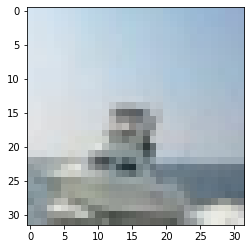

In [3]:
(feature_train, label_train), (feature_test, label_test) = cifar10.load_data() #Load Dataset dari cifar10

print("Train", feature_train.shape, label_train.shape)
print("Test", feature_test.shape, label_test.shape)

plt.imshow(feature_train[100], cmap=plt.get_cmap('gray'))

In [4]:
feature_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

# Feature Engineering

Disini saya masih menggunakan gambar asli pada dataset dan tidak di grayscale maupun di reshape

In [5]:
label_train = to_categorical(label_train)
label_test = to_categorical(label_test)

print(label_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [6]:
#Disini array nya dibagi dengan 255.0 agar nilai hanya antara 0-1
feature_train = feature_train.astype('float32')
feature_test = feature_test.astype('float32')

feature_train = feature_train / 255.0
feature_test = feature_test / 255.0



In [7]:
feature_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

# Baseline Model

In [8]:
base_model = Sequential() #Model yang digunakan Sequential

base_model.add(Flatten(input_shape=(32, 32, 3)))
base_model.add(Dense(64, activation='relu', kernel_initializer='he_uniform')) # Activation relu dengan filter 64
base_model.add(Dense(10, activation='softmax')) 

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), Learning rate 0.01 dan momentum 0.9

base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

base_model.summary()

#model dijalankan dengan Batch_size = 100 karena data nya 50000 karena takut kelamaan dalam proses nya, dan epoch nya 30
history = base_model.fit(feature_train, label_train, batch_size=100, validation_data=(feature_test, label_test), epochs=30) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                196672    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
500/500 [==============================] - 2s 3ms/step - loss: 1.9099 - accuracy: 0.3066 - val_loss: 1.8011 - val_accuracy: 0.3446
Epoch 2/30
500/500 [==============================] - 1s 3ms/step - loss: 1.7540 - accuracy: 0.3702 - val_loss: 1.6988 - val_accuracy: 0.3873
Epoch 3/30
500/500 [==============================] - 1s 3ms/step - loss: 1.6956 - accuracy: 0.3

In [9]:
#fungsi untuk menampilkan grafik epoch vs loss
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [10]:
#Proses dimana nilai dari model dimasukan kedalam tabel
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_accuracy', ascending=False)

,loss,accuracy,val_loss,val_accuracy,epoch
24,1.457538,0.48208,1.527711,0.4629,24
28,1.444939,0.48608,1.535231,0.4572,28
27,1.449449,0.48382,1.542707,0.4529,27
17,1.508936,0.46296,1.546970,0.4529,17
21,1.480381,0.47240,1.542681,0.4524,21
22,1.477212,0.47638,1.537789,0.4514,22
29,1.437927,0.49056,1.551002,0.4490,29
23,1.467276,0.48158,1.554148,0.4480,23
20,1.490884,0.46970,1.556681,0.4470,20
26,1.450934,0.48302,1.557257,0.4463,26


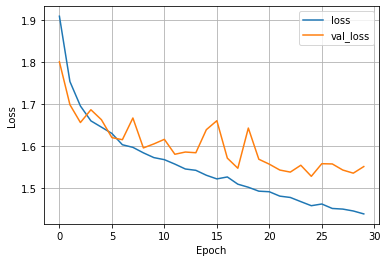

In [11]:
plot_loss(history) # epoch vs loss graph

In [12]:
#Untuk menampilkan hasil evaluasi model
loss, accuracy = base_model.evaluate(feature_test,  label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

313/313 - 1s - loss: 1.5510 - accuracy: 0.4490
Test accuracy: 0.4490000009536743
Test loss: 1.5510023832321167


Dengan Baseline model hasil yang didapatkan masih kurang bagus, mungkin disebabkan karena epoch masih terlalu kecil, dan dataset tidak di grayscale terlebih dahulu

# Convolution Neural Network

In [17]:
model = Sequential() #Model yang digunakan masih Sequential
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3))) # Convolution, 64 filters, masing-masing dengan kernel 3x3

model.add(MaxPooling2D((2, 2))) # Pooling dengan kernel 2x2

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3))) # Convolution, 128 filters, masing-masing dengan kernel 3x3

model.add(MaxPooling2D((2, 2))) # Pooling dengan kernel 2x2
model.add(Flatten()) # Flatten hasil output

# Fully connected layer
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform')) # Activation relu Jumlah filter 64
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.001, momentum=0.9) # Optimizer (Stochastic Gradient Descent), Learning rate nya 0.001 dan momentum 0.9

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

model.summary()

#Disini saya mencoba menjalankan dengan epoch 50 karena pada baseline model dengan epoch 30 hasil nya masih kurang bagus dan learning rate nya saya jadikan 0.001
history_cnn = model.fit(feature_train, label_train, batch_size=100, validation_data=(feature_test, label_test), epochs=100)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                294976    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [18]:
#Untuk menampilkan hasil evaluasi model
loss, accuracy = model.evaluate(feature_test,  label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

313/313 - 1s - loss: 1.8191 - accuracy: 0.6815
Test accuracy: 0.6815000176429749
Test loss: 1.8190505504608154


In [25]:
#Proses dimana nilai dari model dimasukan kedalam tabel
history_dataframe = pd.DataFrame(history_cnn.history)
history_dataframe['epoch'] = history_cnn.epoch
# history_dataframe
history_dataframe.sort_values(by='val_accuracy', ascending=False)

,loss,accuracy,val_loss,val_accuracy,epoch
47,0.424846,0.85972,0.967245,0.7014,47
44,0.459672,0.84664,0.954133,0.7004,44
34,0.595130,0.80002,0.915546,0.7000,34
40,0.509684,0.82972,0.927462,0.6994,40
45,0.447209,0.85272,0.961082,0.6985,45
...,...,...,...,...,...
4,1.250872,0.56260,1.251298,0.5613,4
3,1.318781,0.53732,1.310780,0.5365,3
2,1.402156,0.50332,1.359485,0.5195,2
1,1.534740,0.45642,1.485301,0.4759,1


In [27]:
#Proses dimana nilai dari model dimasukan kedalam tabel
history_dataframe = pd.DataFrame(history_cnn.history)
history_dataframe['epoch'] = history_cnn.epoch
# history_dataframe
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,accuracy,val_loss,val_accuracy,epoch
30,0.652592,0.77846,0.915426,0.6961,30
34,0.595130,0.80002,0.915546,0.7000,34
28,0.680389,0.76844,0.917841,0.6909,28
33,0.613092,0.79366,0.918999,0.6974,33
31,0.641613,0.78186,0.921120,0.6968,31
...,...,...,...,...,...
95,0.037191,0.99764,1.729891,0.6852,95
96,0.035020,0.99800,1.765883,0.6816,96
97,0.033453,0.99812,1.770059,0.6806,97
98,0.031573,0.99862,1.789960,0.6855,98


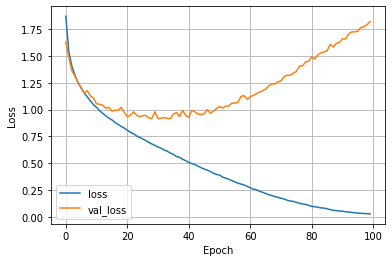

In [20]:
plot_loss(history_cnn) #Grafik Epoch vs Loss

Untuk Model CNN hasil yang didapatkan lebih bagus dari Baseline Model namun memang masih belum mendapatkan hasil terbaik, mungkin di karenakan Epoch nya terlalu sedikit, dan dataset nya belum di grayscale. Accuracy dari CNN Model yaitu 70%	val_loss 0.915546	yang didapatkan pada Epoch ke-34